<div style="background-color:black; color:white; font-family: 'Times New Roman', serif;">
    <h1>Loading and Displaying Images</h1>
</div>

In [1]:
import os
from PIL import Image
import numpy as np

dataset_path = 'dataset'
target_size = (256, 256)

data = []
labels = []

for class_index in range(1, 11):
    class_folder = os.path.join(dataset_path, str(class_index))
    
    # Check if the class folder exists
    if os.path.exists(class_folder) and os.path.isdir(class_folder):
        # List all files in the class folder
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            if image_path.endswith('.jpg'):
                # Open the image
                with Image.open(image_path) as img:
                    # Resize the image
                    img = img.resize(target_size)
                    
                    # Convert the image to a numpy array and normalize the pixels
                    img_array = np.array(img) / 255.0
                    
                    # Append the image data and label to the lists
                    data.append(img_array)
                    labels.append(class_index)
    else:
        print(f"Folder {class_folder} does not exist or is not a directory")

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

print("Images loaded and resized:", data.shape)
print("Labels collected:", labels.shape)


Images loaded and resized: (695, 256, 256, 3)
Labels collected: (695,)


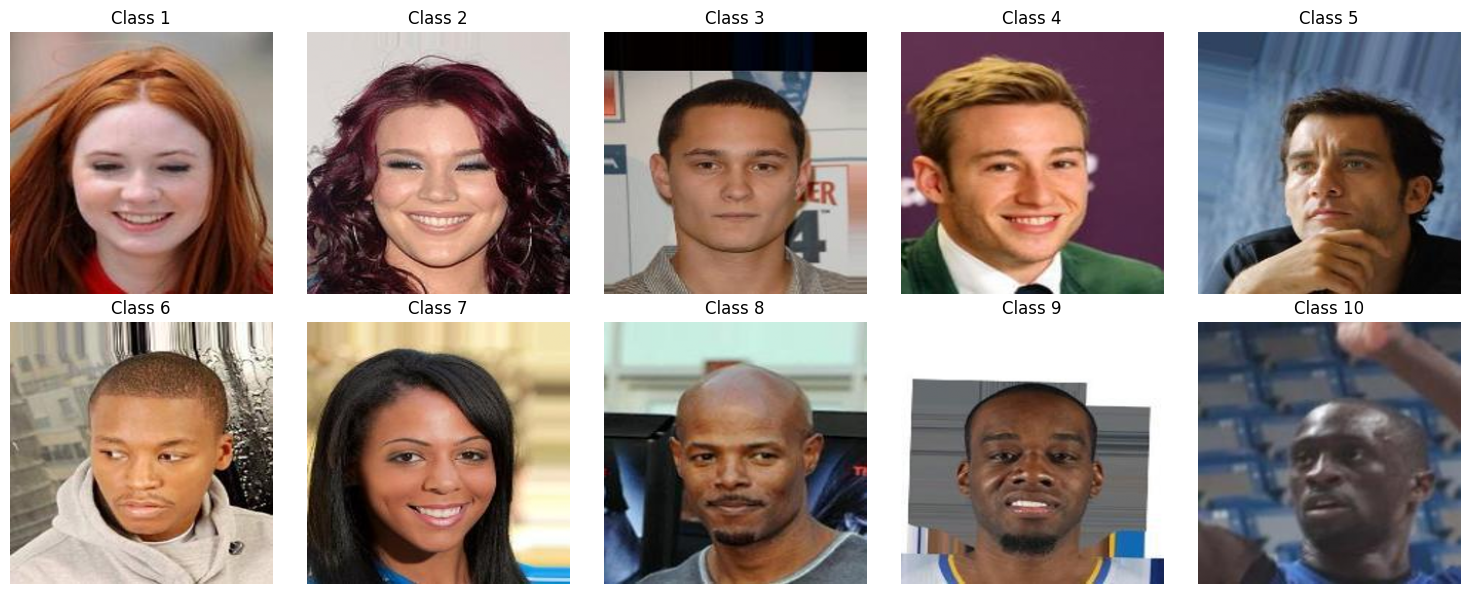

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set up the grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))  # Adjust the grid size and figure dimensions as needed
axes = axes.flatten()  # Flatten the grid to ease indexing

# We'll use a dictionary to track the first appearance of each class
displayed_classes = {}

# Iterate over the images and their corresponding labels
for idx, label in enumerate(labels):
    if label not in displayed_classes:
        displayed_classes[label] = True  # Mark the class as displayed
        
        # Display the image in the corresponding subplot
        ax = axes[label - 1]  # Adjust index since label starts from 1
        ax.imshow(data[idx])
        ax.set_title(f'Class {label}')
        ax.axis('off')

        # Check if all classes have been displayed
        if len(displayed_classes) == 10:
            break  # Exit loop once one image from each class is displayed

plt.tight_layout()
plt.show()


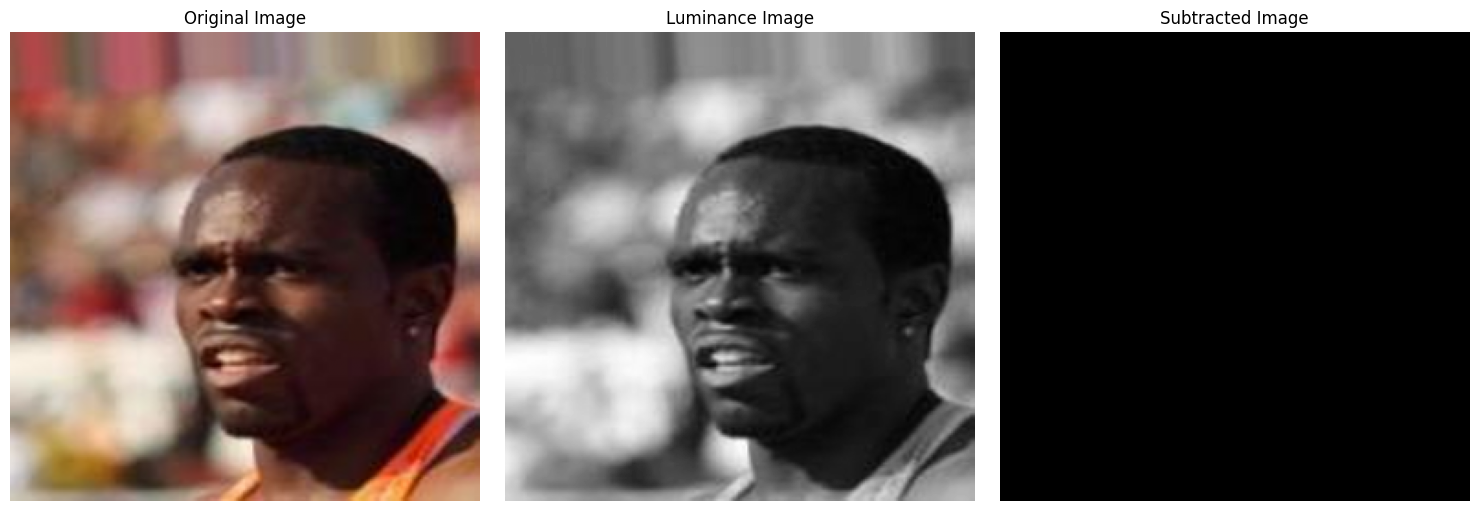

In [23]:
import matplotlib.pyplot as plt

luminance_images = []
subtracted_images = []

for img in data:
    # Extract the R, G, B channels
    R = img[:, :, 0]
    G = img[:, :, 1]
    B = img[:, :, 2]
    
    # Calculate the luminance according to the ITU-R BT.709 formula
    Y = 0.2126 * R + 0.7152 * G + 0.0722 * B
    
    # Append the luminance image to the list
    luminance_images.append(Y)
    
    # Subtract luminance from each channel
    img_subtracted = img -Y[:, :, np.newaxis]
    img_subtracted = np.clip(img_subtracted, 0, 255).astype(np.uint8)  # Clip to ensure the pixel values remain valid
    subtracted_images.append(img_subtracted)

# Convert the list of luminance images to a NumPy array if needed
luminance_images = np.array(luminance_images)
subtracted_images = np.array(subtracted_images)

# Display an example luminance image, the original image, and the subtracted image
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(data[500])
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(luminance_images[500], cmap='gray')
axes[1].set_title('Luminance Image')
axes[1].axis('off')

axes[2].imshow(subtracted_images[500])
axes[2].set_title('Subtracted Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()


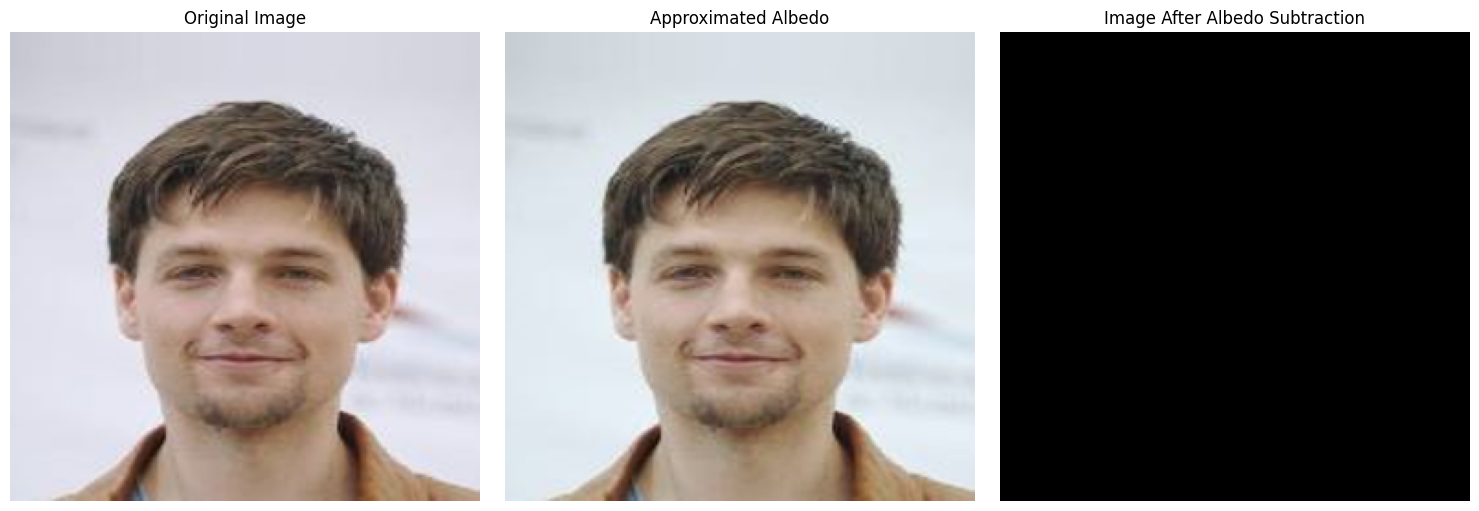

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' contains normalized RGB images
approx_albedo = []
subtracted_images = []

for img in data:
    # Calculate the max intensity per channel
    max_intensity = np.max(img, axis=(0, 1))
    
    # Normalize RGB by its max intensity in each channel to get approximated albedo
    norm_albedo = img / max_intensity
    
    # Store approximated albedo
    approx_albedo.append(norm_albedo)
    
    # Subtract approximated albedo from the original image
    img_subtracted = img - norm_albedo
    img_subtracted = np.clip(img_subtracted, 0, 1)  # Ensure values stay within valid range after subtraction
    subtracted_images.append(img_subtracted)

# Optionally, display an example
# Display the original, albedo, and subtracted image side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(data[50])
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(approx_albedo[50])
axes[1].set_title('Approximated Albedo')
axes[1].axis('off')

axes[2].imshow(subtracted_images[50])
axes[2].set_title('Image After Albedo Subtraction')
axes[2].axis('off')

plt.tight_layout()
plt.show()


<div style="background-color:black; color:white; font-family: 'Times New Roman', serif;">
    <h1>LDA</h1>
</div>

In [24]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Flatten the data
data_flattened = data.reshape(data.shape[0], -1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_flattened, labels, test_size=0.3, random_state=42)

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Train the model
lda.fit(X_train, y_train)

# Predict on the test set
y_pred = lda.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 50.72%


<div style="background-color:black; color:white; font-family: 'Times New Roman', serif;">
    <h1>PCA with LDA</h1>
</div>

In [25]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data_flattened = data.reshape(data.shape[0], -1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_flattened, labels, test_size=0.3, random_state=42)

# Initialize PCA and LDA
pca = PCA(n_components=0.95)  # Keep 95% of variance
lda = LinearDiscriminantAnalysis()

# Fit PCA on the training data
X_train_pca = pca.fit_transform(X_train)

# Transform test data with the same PCA
X_test_pca = pca.transform(X_test)

# Train the LDA model on the PCA-transformed training data
lda.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test set
y_pred = lda.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 47.37%


<div style="background-color:black; color:white; font-family: 'Times New Roman', serif;">
    <h1>PCA with Logistic Regression</h1>
</div>

In [31]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume data is already loaded and is available as `data` and `labels`
# Flatten the data if necessary (if images are not already in flattened form)
data_flattened = data.reshape(data.shape[0], -1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_flattened, labels, test_size=0.3, random_state=42)

# Initialize PCA and Logistic Regression
pca = PCA(n_components=0.75)  # Keep 75% of variance
logistic = LogisticRegression(max_iter=5000)

# Fit PCA on the training data
X_train_pca = pca.fit_transform(X_train)

# Transform test data with the same PCA
X_test_pca = pca.transform(X_test)

# Train the Logistic Regression model on the transformed training data
logistic.fit(X_train_pca, y_train)

# Predict on the transformed test set
y_pred = logistic.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 49.76%


/Users/amna/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<div style="background-color:black; color:white; font-family: 'Times New Roman', serif;">
    <h1>Simple Autoencoder with Log Regression</h1>
</div>

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

data_flattened = data.reshape(data.shape[0], -1)  # Flatten images 

# Split data into training and testing sets
X_train, X_test = train_test_split(data_flattened, test_size=0.3, random_state=42)

encoding_dim = 32  # size of the encoded representations

# Input 
input_img = Input(shape=(X_train.shape[1],))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(X_train.shape[1], activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(X_train, X_train,
                epochs=500,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))


Epoch 1/500
2/2 [==============================] - 6s 3s/step - loss: 0.6932 - val_loss: 0.6936
Epoch 2/500
2/2 [==============================] - 2s 977ms/step - loss: 0.6934 - val_loss: 0.6931
Epoch 3/500
2/2 [==============================] - 2s 930ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 4/500
2/2 [==============================] - 2s 1s/step - loss: 0.6930 - val_loss: 0.6929
Epoch 5/500
2/2 [==============================] - 2s 973ms/step - loss: 0.6928 - val_loss: 0.6924
Epoch 6/500
2/2 [==============================] - 2s 1s/step - loss: 0.6918 - val_loss: 0.6896
Epoch 7/500
2/2 [==============================] - 2s 967ms/step - loss: 0.6879 - val_loss: 0.6819
Epoch 8/500
2/2 [==============================] - 2s 946ms/step - loss: 0.6797 - val_loss: 0.6727
Epoch 9/500
2/2 [==============================] - 2s 733ms/step - loss: 0.6704 - val_loss: 0.6625
Epoch 10/500
2/2 [==============================] - 2s 835ms/step - loss: 0.6613 - val_loss: 0.6538
Epoch 11/500
2/2 [

2/2 [==============================] - 2s 799ms/step - loss: 0.6230 - val_loss: 0.6268
Epoch 165/500
2/2 [==============================] - 2s 765ms/step - loss: 0.6229 - val_loss: 0.6268
Epoch 166/500
2/2 [==============================] - 2s 1s/step - loss: 0.6228 - val_loss: 0.6267
Epoch 167/500
2/2 [==============================] - 2s 823ms/step - loss: 0.6227 - val_loss: 0.6267
Epoch 168/500
2/2 [==============================] - 2s 964ms/step - loss: 0.6227 - val_loss: 0.6267
Epoch 169/500
2/2 [==============================] - 2s 835ms/step - loss: 0.6227 - val_loss: 0.6266
Epoch 170/500
2/2 [==============================] - 2s 910ms/step - loss: 0.6226 - val_loss: 0.6266
Epoch 171/500
2/2 [==============================] - 2s 859ms/step - loss: 0.6225 - val_loss: 0.6265
Epoch 172/500
2/2 [==============================] - 2s 806ms/step - loss: 0.6225 - val_loss: 0.6267
Epoch 173/500
2/2 [==============================] - 2s 822ms/step - loss: 0.6225 - val_loss: 0.6265
Epoch 1

2/2 [==============================] - 2s 845ms/step - loss: 0.6144 - val_loss: 0.6210
Epoch 327/500
2/2 [==============================] - 2s 853ms/step - loss: 0.6144 - val_loss: 0.6210
Epoch 328/500
2/2 [==============================] - 2s 848ms/step - loss: 0.6143 - val_loss: 0.6209
Epoch 329/500
2/2 [==============================] - 2s 807ms/step - loss: 0.6143 - val_loss: 0.6209
Epoch 330/500
2/2 [==============================] - 2s 795ms/step - loss: 0.6143 - val_loss: 0.6209
Epoch 331/500
2/2 [==============================] - 2s 838ms/step - loss: 0.6142 - val_loss: 0.6209
Epoch 332/500
2/2 [==============================] - 2s 954ms/step - loss: 0.6142 - val_loss: 0.6209
Epoch 333/500
2/2 [==============================] - 2s 884ms/step - loss: 0.6141 - val_loss: 0.6209
Epoch 334/500
2/2 [==============================] - 2s 868ms/step - loss: 0.6141 - val_loss: 0.6208
Epoch 335/500
2/2 [==============================] - 2s 836ms/step - loss: 0.6140 - val_loss: 0.6208
Epoc

2/2 [==============================] - 2s 816ms/step - loss: 0.6093 - val_loss: 0.6182
Epoch 489/500
2/2 [==============================] - 2s 800ms/step - loss: 0.6093 - val_loss: 0.6182
Epoch 490/500
2/2 [==============================] - 2s 827ms/step - loss: 0.6092 - val_loss: 0.6182
Epoch 491/500
2/2 [==============================] - 2s 826ms/step - loss: 0.6092 - val_loss: 0.6185
Epoch 492/500
2/2 [==============================] - 1s 739ms/step - loss: 0.6095 - val_loss: 0.6183
Epoch 493/500
2/2 [==============================] - 2s 792ms/step - loss: 0.6092 - val_loss: 0.6182
Epoch 494/500
2/2 [==============================] - 2s 807ms/step - loss: 0.6093 - val_loss: 0.6183
Epoch 495/500
2/2 [==============================] - 2s 780ms/step - loss: 0.6094 - val_loss: 0.6181
Epoch 496/500
2/2 [==============================] - 1s 534ms/step - loss: 0.6091 - val_loss: 0.6184
Epoch 497/500
2/2 [==============================] - 1s 548ms/step - loss: 0.6093 - val_loss: 0.6183
Epoc

In [37]:
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

7/7 [==============================] - 0s 3ms/step


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assume 'labels' are available and have been split into y_train and y_test corresponding to X_train and X_test
_, _, y_train, y_test = train_test_split(data_flattened, labels, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model on the encoded training data
classifier = LogisticRegression()
classifier.fit(X_train_encoded, y_train)

# Predict on the encoded test data
y_pred = classifier.predict(X_test_encoded)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 16.75%


/Users/amna/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<div style="background-color:black; color:white; font-family: 'Times New Roman', serif;">
    <h1>LDA with Autoencoder</h1>
</div>

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming `data_flattened` contains the flattened image data and `labels` the corresponding labels
# First, split the original data to ensure that labels match the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_flattened, labels, test_size=0.3, random_state=42)

# Encode the data using your pre-trained autoencoder (assuming the encoder is already trained and defined as 'encoder')
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Train the LDA model on the encoded training data
lda.fit(X_train_encoded, y_train)

# Predict on the encoded test data
y_pred = lda.predict(X_test_encoded)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


7/7 [==============================] - 0s 2ms/step
Accuracy: 17.70%
